# Minneapolis College Library Springshare Data Analysis
# Sessions  
## William Vann
### 5/2023

In [1]:
# Import dependencies

from datetime import datetime as dt
from scipy import stats as st

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [2]:
sessions_df_alltime = pd.read_csv("sessions_alltime.csv")
sessions_df_alltime

,Date,Sessions
0,2014-03,54
1,2014-04,218
2,2014-05,108
3,2014-06,92
4,2014-07,70
...,...,...
106,2023-01,1789
107,2023-02,2043
108,2023-03,1765
109,2023-04,1671


In [3]:
# # Remove first and last rows with minimal data

# sessions_df_alltime = sessions_df_alltime.iloc[1:-1]
# sessions_df_alltime = sessions_df_alltime.reset_index(drop=True)

# sessions_df_alltime

In [4]:
# Get basic info on this dataset

sessions_df_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      111 non-null    object
 1   Sessions  111 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [5]:
# Checking for null values in Views column

sessions_df_alltime["Sessions"].isna().sum()

0

In [6]:
# Summary stats for Total column

sessions_df_alltime["Sessions"].describe()

count     111.000000
mean     1204.297297
std       910.672045
min        47.000000
25%       294.500000
50%      1096.000000
75%      1928.000000
max      2925.000000
Name: Sessions, dtype: float64

In [7]:
sessions_df_alltime["Date"] = pd.to_datetime(sessions_df_alltime["Date"])

In [8]:
sessions_df_alltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      111 non-null    datetime64[ns]
 1   Sessions  111 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [9]:
sessions_df_alltime

,Date,Sessions
0,2014-03-01,54
1,2014-04-01,218
2,2014-05-01,108
3,2014-06-01,92
4,2014-07-01,70
...,...,...
106,2023-01-01,1789
107,2023-02-01,2043
108,2023-03-01,1765
109,2023-04-01,1671


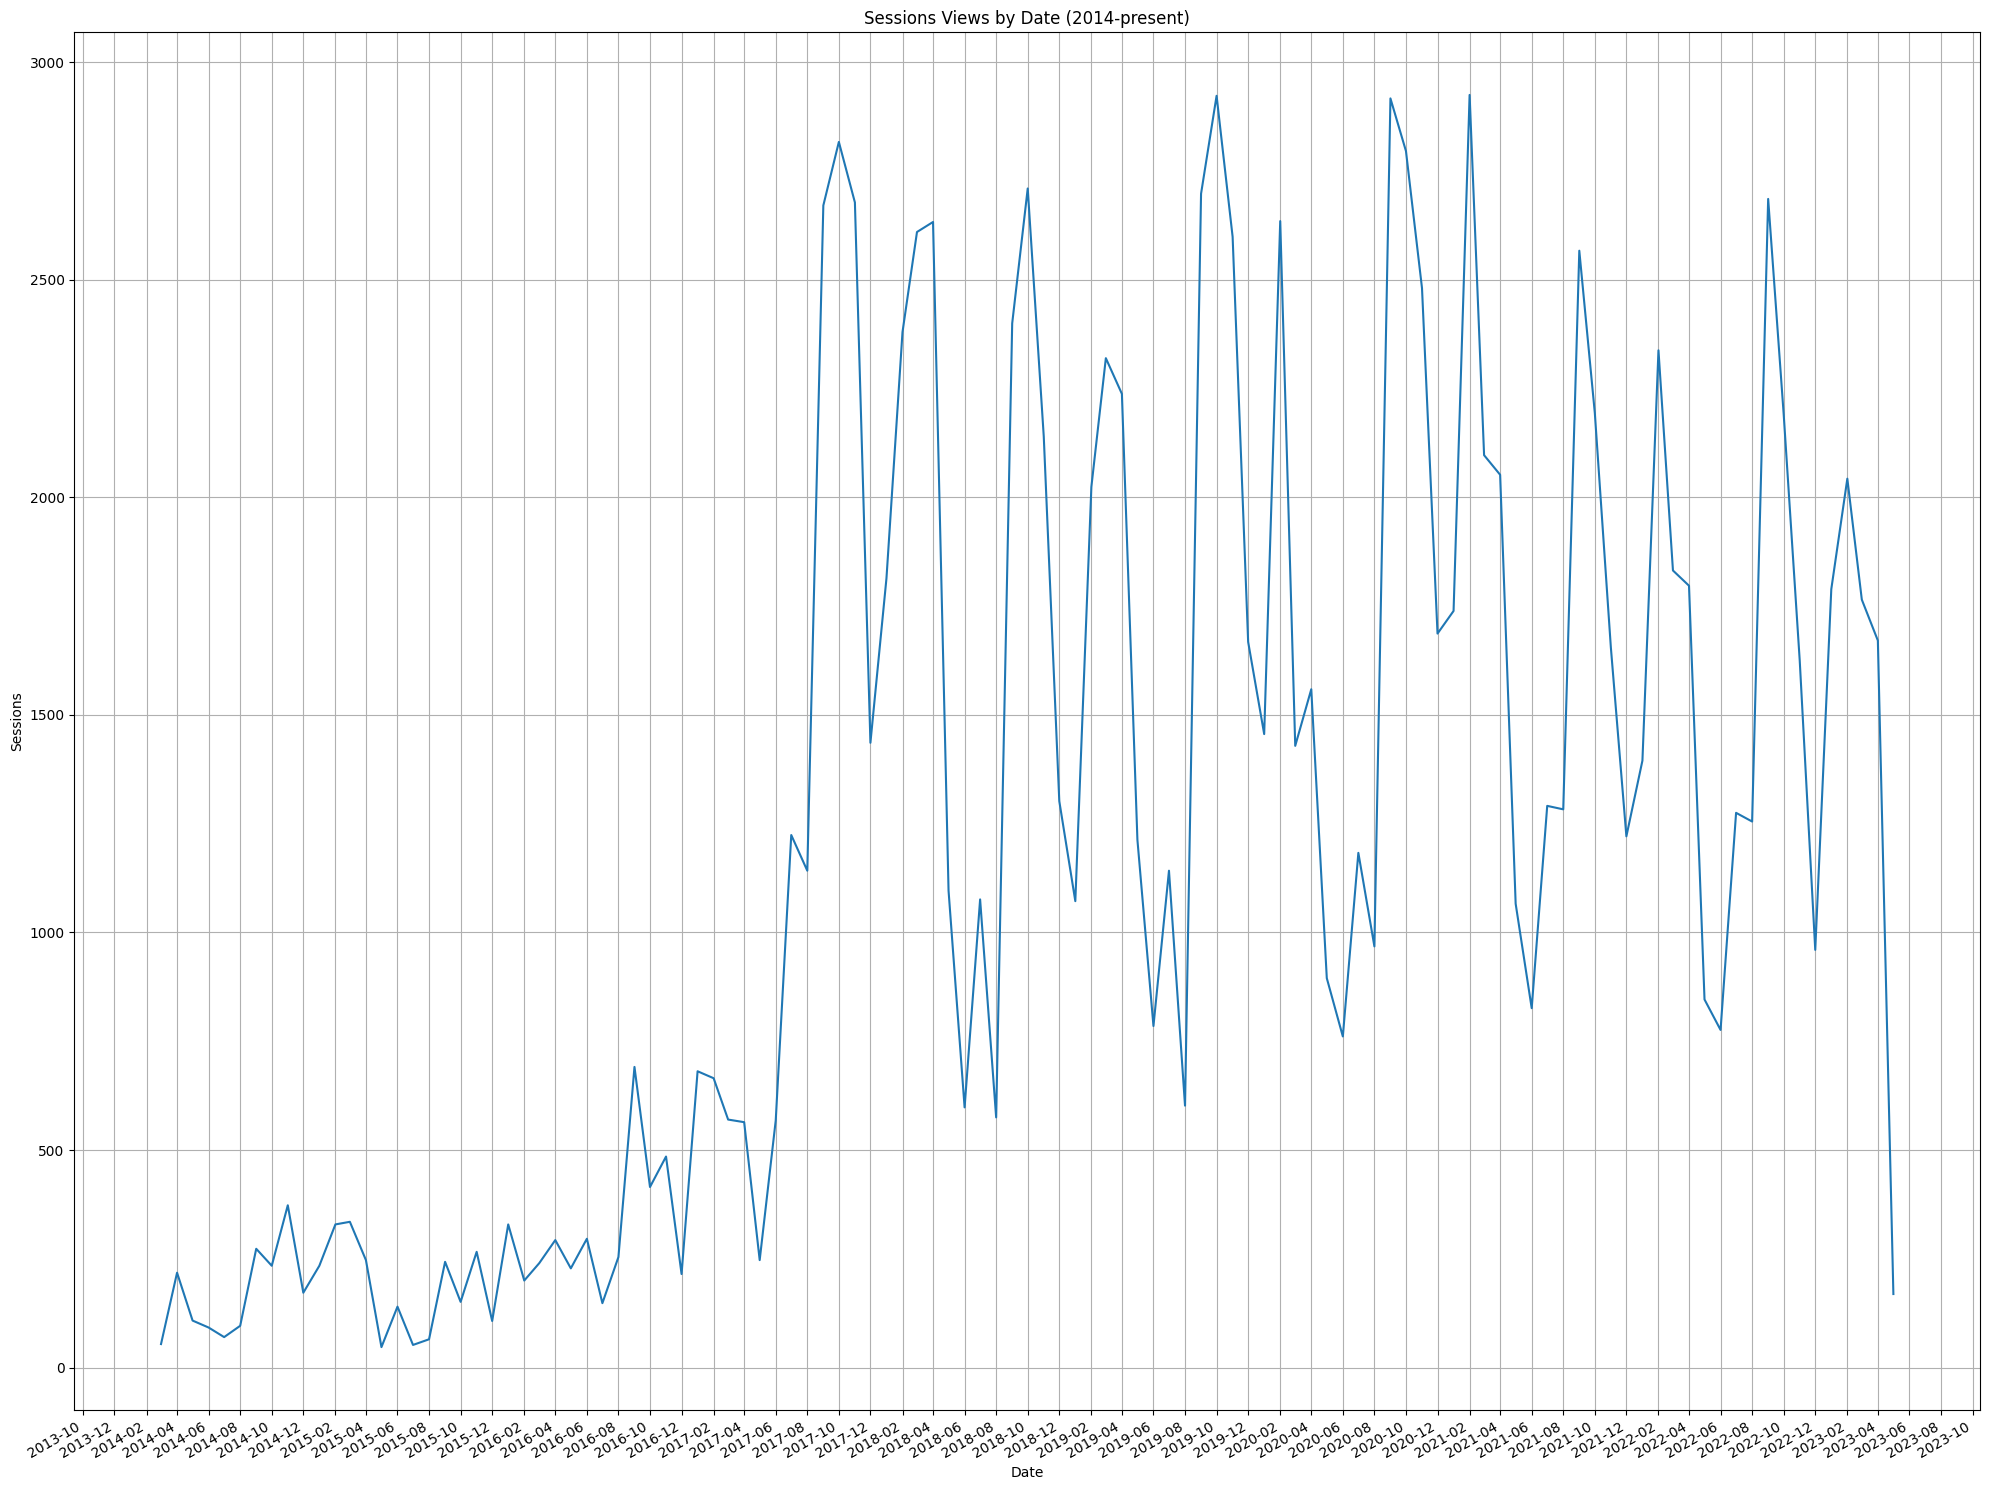

In [10]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.set_title("Sessions Views by Date (2014-present)")
ax.grid(True)
ax.set_xlabel("Date")
ax.set_ylabel("Sessions")

month_locator = mdates.MonthLocator(interval=2)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

# Same as above
ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(sessions_df_alltime["Date"], sessions_df_alltime["Sessions"])

fig.autofmt_xdate()
plt.tight_layout()

fig.savefig("Sessions/sessions.png")

# Analysis by Terms

In [11]:
sessions_summer_terms = sessions_df_alltime.loc[(sessions_df_alltime["Date"].dt.month == 5) | 
                                       (sessions_df_alltime["Date"].dt.month == 6) |
                                       (sessions_df_alltime["Date"].dt.month == 7), :]
sessions_summer_terms = sessions_summer_terms.reset_index(drop=True)

sessions_summer_terms["Formatted_Date"] = sessions_summer_terms["Date"].dt.strftime("%m-%Y")

sessions_summer_terms

,Date,Sessions,Formatted_Date
0,2014-05-01,108,05-2014
1,2014-06-01,92,06-2014
2,2014-07-01,70,07-2014
3,2015-05-01,47,05-2015
4,2015-06-01,140,06-2015
5,2015-07-01,52,07-2015
6,2016-05-01,228,05-2016
7,2016-06-01,296,06-2016
8,2016-07-01,148,07-2016
9,2017-05-01,247,05-2017


In [12]:
sessions_fall_terms = sessions_df_alltime.loc[(sessions_df_alltime["Date"].dt.month == 8) | 
                                       (sessions_df_alltime["Date"].dt.month == 9) |
                                       (sessions_df_alltime["Date"].dt.month == 10) |
                                       (sessions_df_alltime["Date"].dt.month == 11) |
                                       (sessions_df_alltime["Date"].dt.month == 12), :]
sessions_fall_terms = sessions_fall_terms.reset_index(drop=True)

sessions_fall_terms["Formatted_Date"] = sessions_fall_terms["Date"].dt.strftime("%m-%Y")

sessions_fall_terms

,Date,Sessions,Formatted_Date
0,2014-08-01,96,08-2014
1,2014-09-01,273,09-2014
2,2014-10-01,234,10-2014
3,2014-11-01,373,11-2014
4,2014-12-01,172,12-2014
5,2015-08-01,65,08-2015
6,2015-09-01,243,09-2015
7,2015-10-01,151,10-2015
8,2015-11-01,266,11-2015
9,2015-12-01,107,12-2015


In [13]:
sessions_spring_terms = sessions_df_alltime.loc[(sessions_df_alltime["Date"].dt.month == 1) | 
                                       (sessions_df_alltime["Date"].dt.month == 2) |
                                       (sessions_df_alltime["Date"].dt.month == 3) |
                                       (sessions_df_alltime["Date"].dt.month == 4), :]
sessions_spring_terms = sessions_spring_terms.reset_index(drop=True)

sessions_spring_terms["Formatted_Date"] = sessions_spring_terms["Date"].dt.strftime("%m-%Y")

sessions_spring_terms

,Date,Sessions,Formatted_Date
0,2014-03-01,54,03-2014
1,2014-04-01,218,04-2014
2,2015-01-01,234,01-2015
3,2015-02-01,329,02-2015
4,2015-03-01,335,03-2015
5,2015-04-01,247,04-2015
6,2016-01-01,329,01-2016
7,2016-02-01,200,02-2016
8,2016-03-01,240,03-2016
9,2016-04-01,293,04-2016


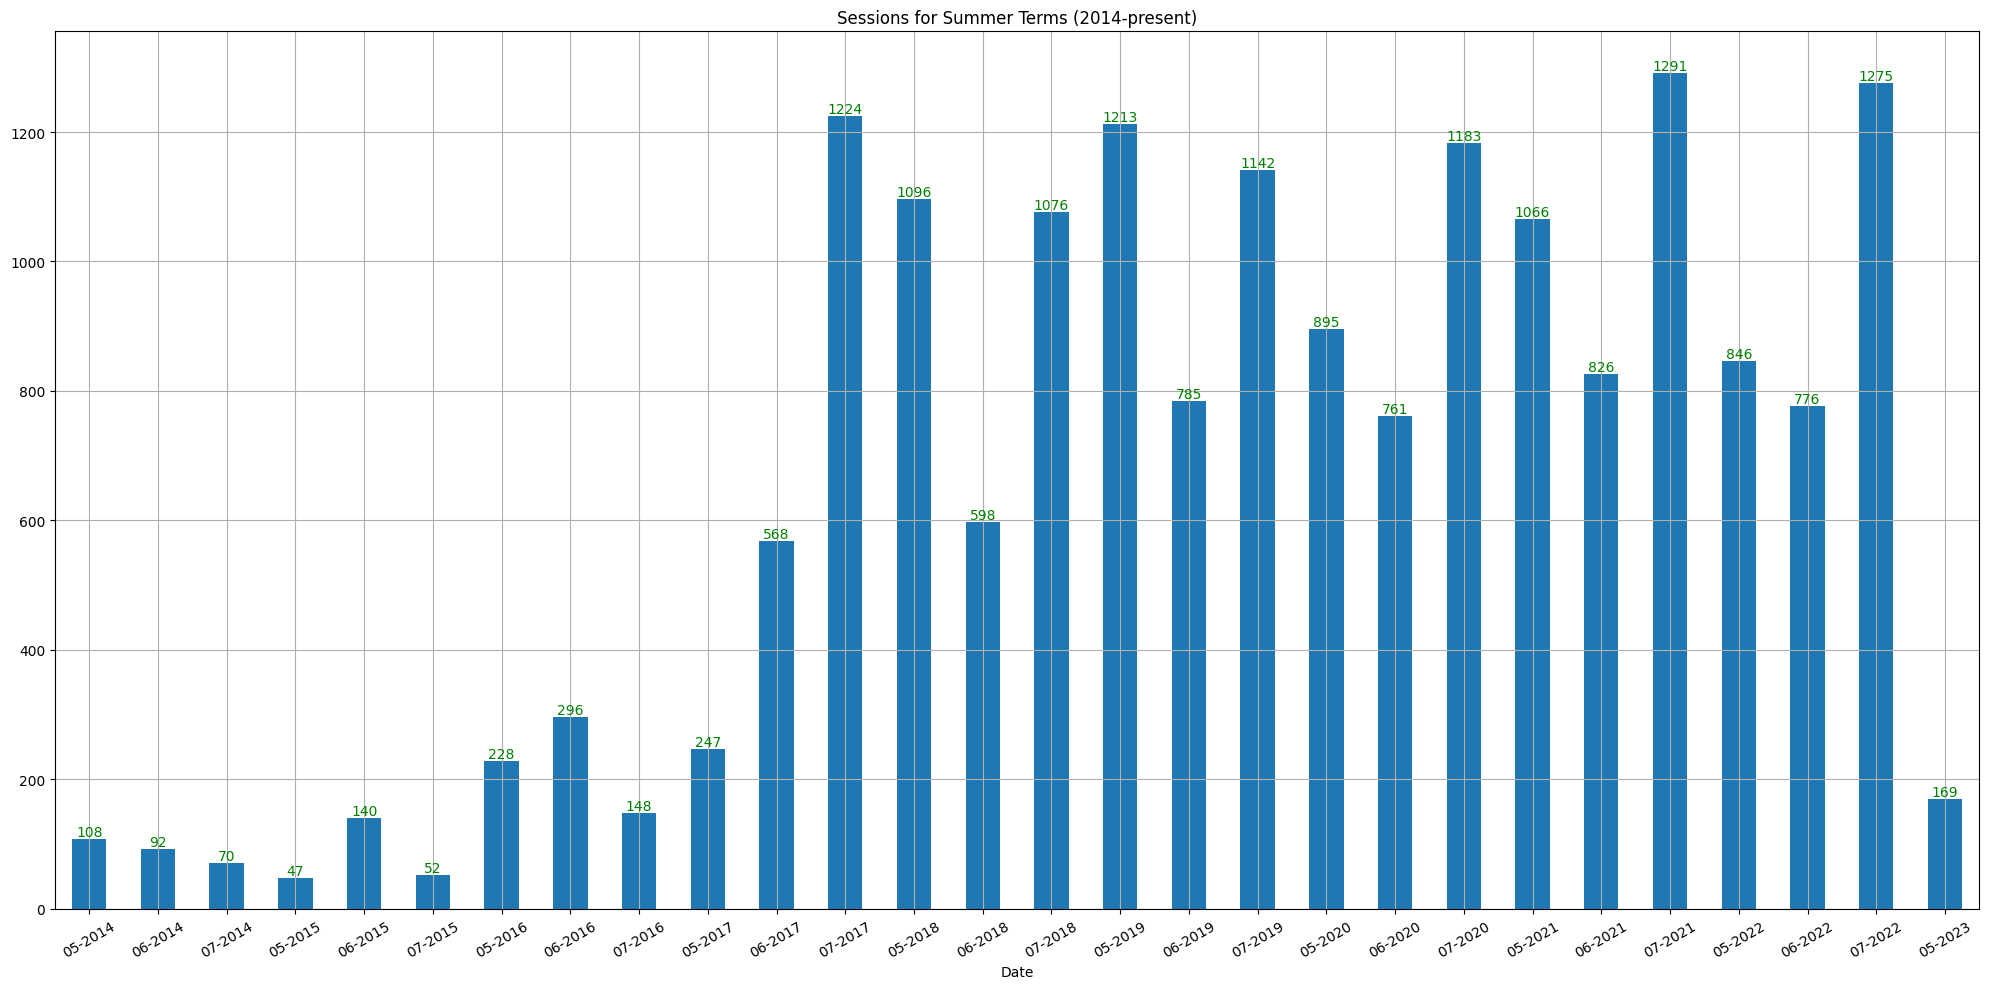

In [14]:
ax = sessions_summer_terms.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Summer Terms (2014-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/sessions_summers.png")

plt.show()

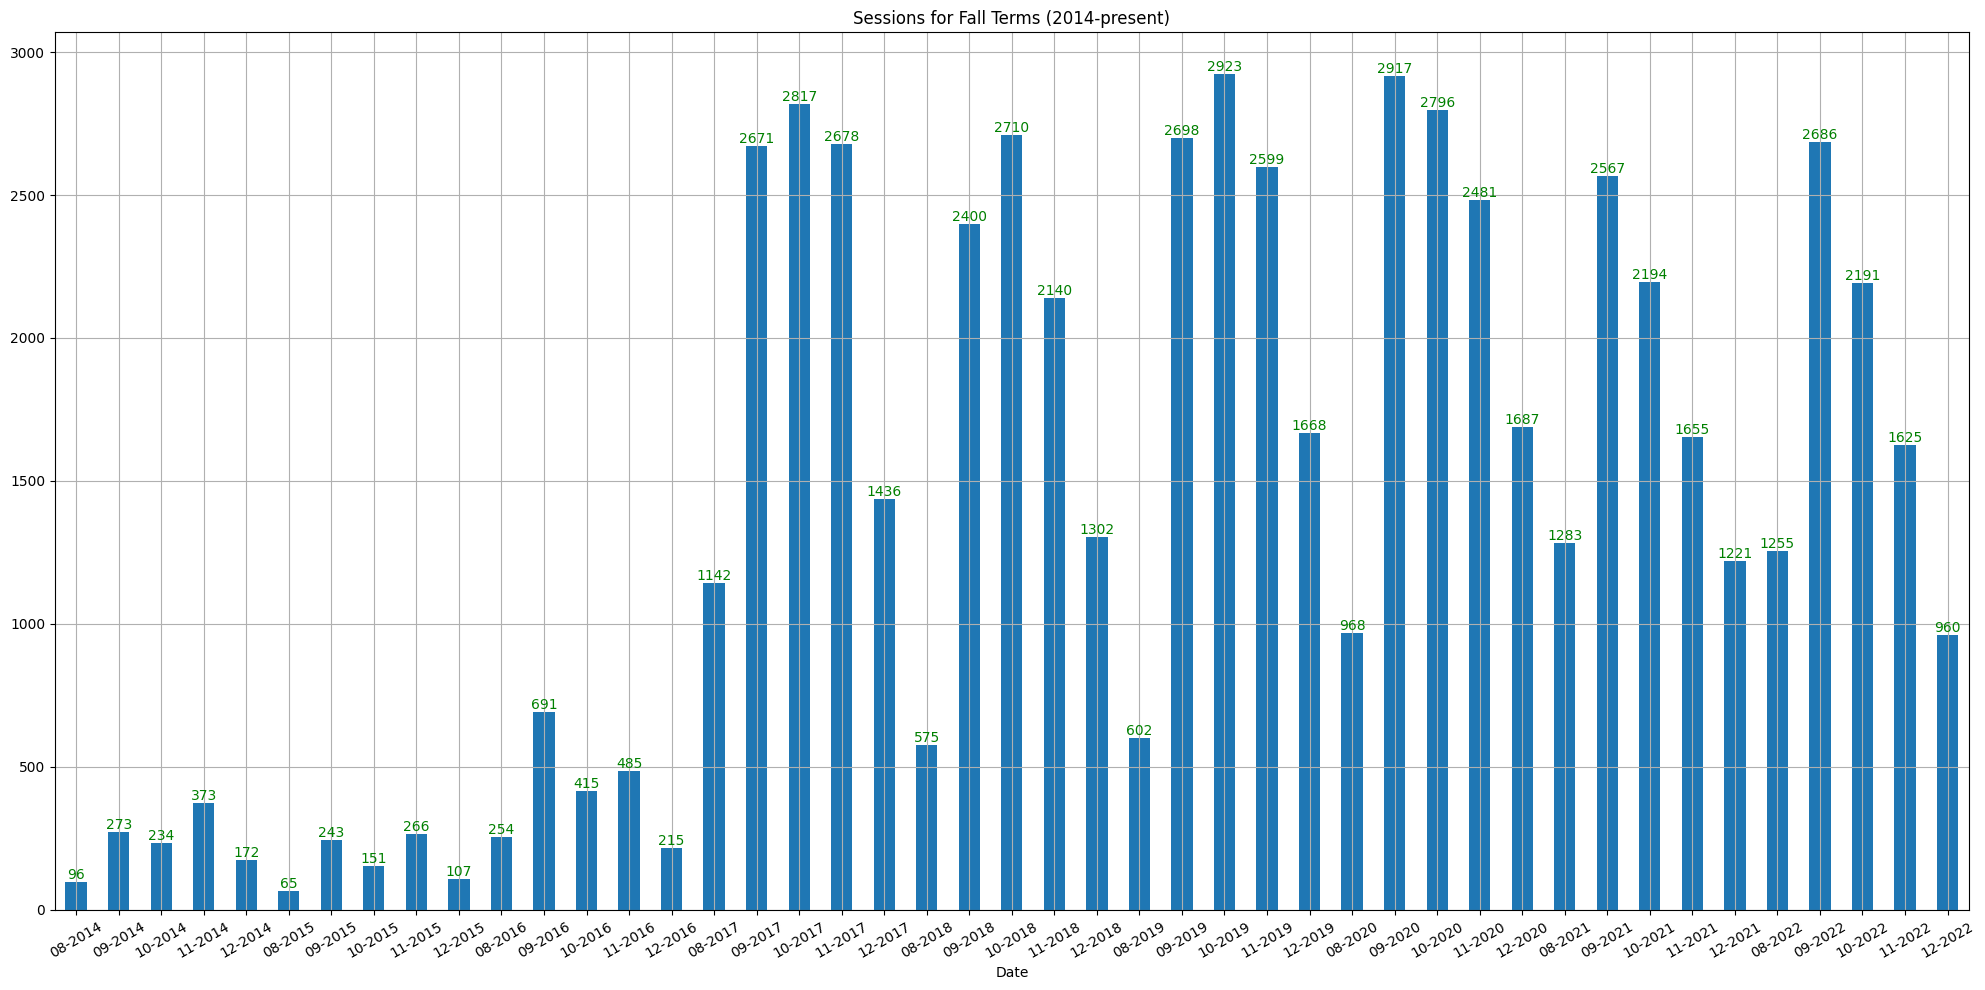

In [15]:
ax = sessions_fall_terms.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Fall Terms (2014-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/sessions_fall.png")

plt.show()

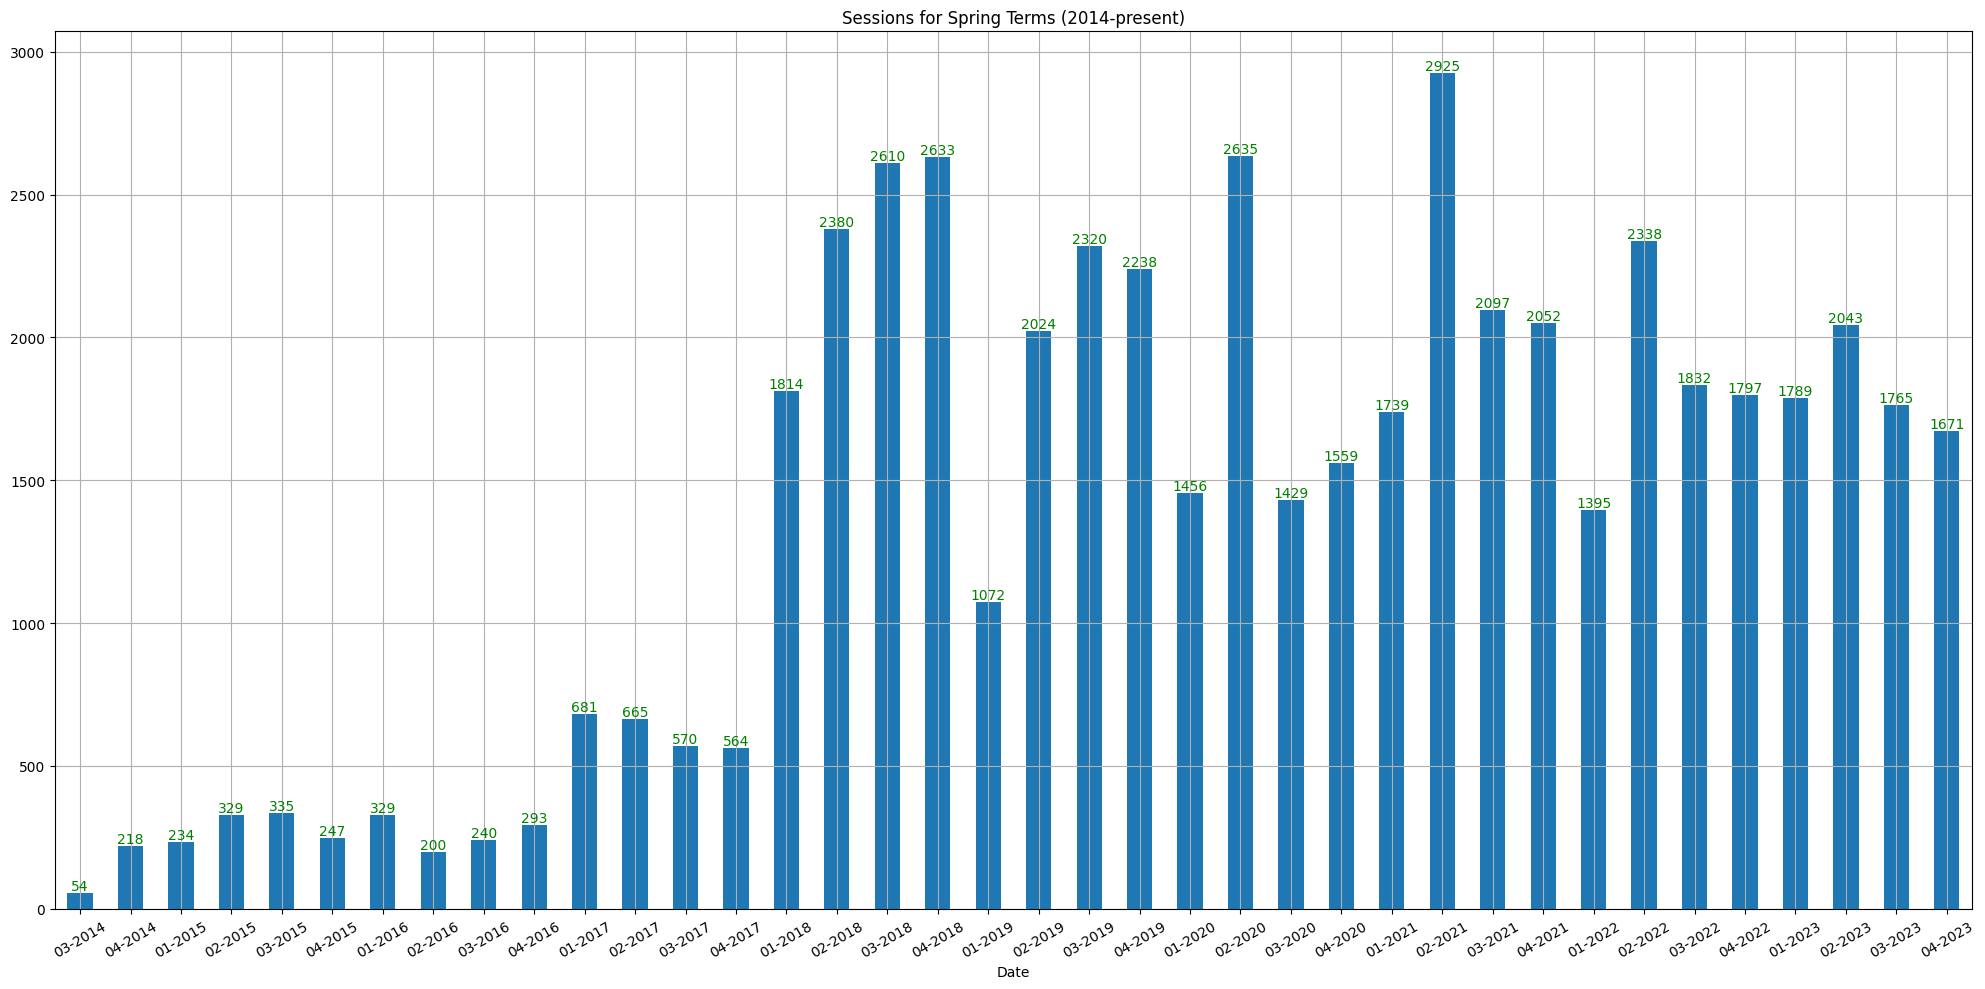

In [16]:
ax = sessions_spring_terms.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(20,10),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Spring Terms (2014-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/sessions_spring.png")

plt.show()

In [17]:
sessions_summer_bymonth = sessions_summer_terms.sort_values(by="Formatted_Date")
sessions_summer_bymonth

mays = sessions_summer_bymonth.loc[ (sessions_summer_bymonth["Formatted_Date"].str.startswith("05")), ["Formatted_Date", "Sessions"]]
junes = sessions_summer_bymonth.loc[ (sessions_summer_bymonth["Formatted_Date"].str.startswith("06")), ["Formatted_Date", "Sessions"]]
julys = sessions_summer_bymonth.loc[ (sessions_summer_bymonth["Formatted_Date"].str.startswith("07")), ["Formatted_Date", "Sessions"]]

In [18]:
sessions_fall_bymonth = sessions_fall_terms.sort_values(by="Formatted_Date")
sessions_fall_bymonth = sessions_fall_bymonth.reset_index(drop=True)
sessions_fall_bymonth

augusts = sessions_fall_bymonth.loc[ (sessions_fall_bymonth["Formatted_Date"].str.startswith("08")), ["Formatted_Date", "Sessions"]]
septembers = sessions_fall_bymonth.loc[ (sessions_fall_bymonth["Formatted_Date"].str.startswith("09")), ["Formatted_Date", "Sessions"]]
octobers = sessions_fall_bymonth.loc[ (sessions_fall_bymonth["Formatted_Date"].str.startswith("10")), ["Formatted_Date", "Sessions"]]
novembers = sessions_fall_bymonth.loc[ (sessions_fall_bymonth["Formatted_Date"].str.startswith("11")), ["Formatted_Date", "Sessions"]]
decembers = sessions_fall_bymonth.loc[ (sessions_fall_bymonth["Formatted_Date"].str.startswith("12")), ["Formatted_Date", "Sessions"]]

In [19]:
sessions_spring_bymonth = sessions_spring_terms.sort_values(by="Formatted_Date")
sessions_spring_bymonth = sessions_spring_bymonth.reset_index(drop=True)
sessions_spring_bymonth

januarys = sessions_spring_bymonth.loc[ (sessions_spring_bymonth["Formatted_Date"].str.startswith("01")), ["Formatted_Date", "Sessions"]]
februarys = sessions_spring_bymonth.loc[ (sessions_spring_bymonth["Formatted_Date"].str.startswith("02")), ["Formatted_Date", "Sessions"]]
marchs = sessions_spring_bymonth.loc[ (sessions_spring_bymonth["Formatted_Date"].str.startswith("03")), ["Formatted_Date", "Sessions"]]
aprils = sessions_spring_bymonth.loc[ (sessions_spring_bymonth["Formatted_Date"].str.startswith("04")), ["Formatted_Date", "Sessions"]]

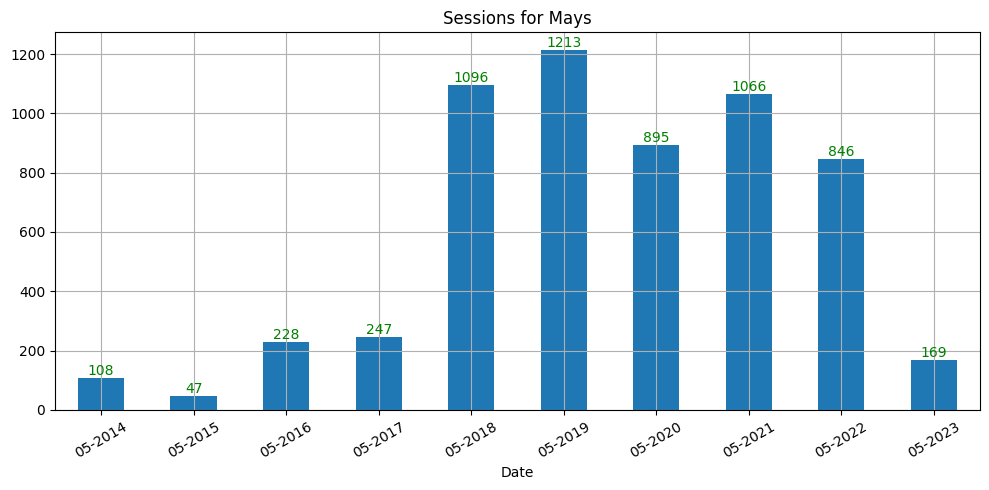

In [20]:
ax5 = mays.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Mays"        
)

ax5.bar_label(ax5.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/mays.png")

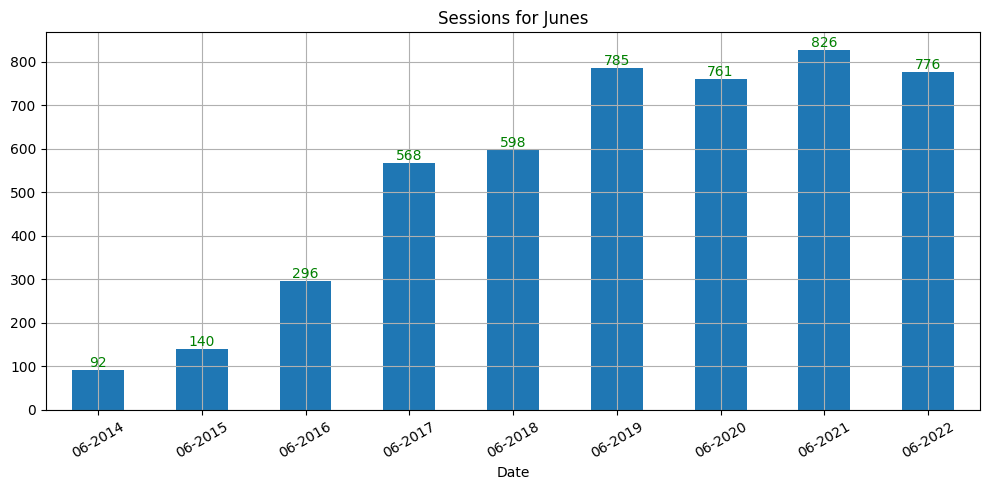

In [21]:
ax6 = junes.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Junes")

ax6.bar_label(ax6.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/junes.png")

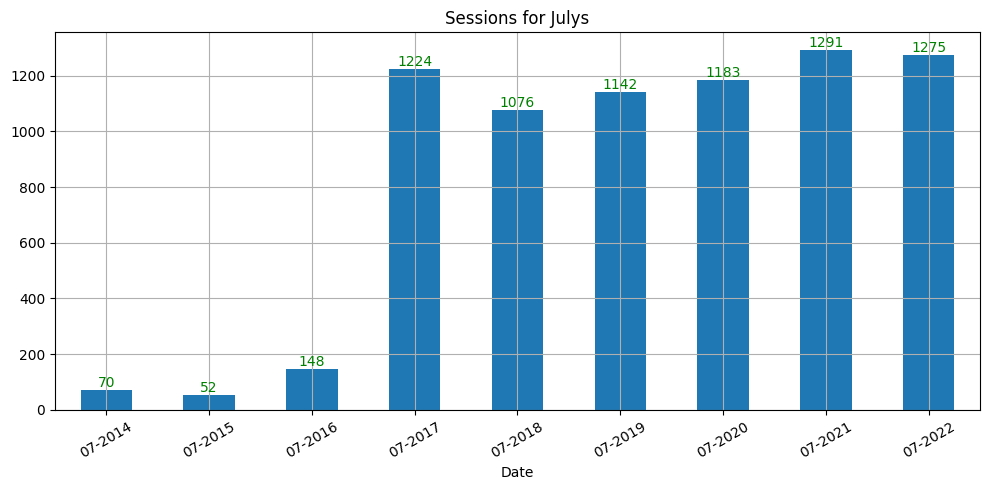

In [22]:
ax7 = julys.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Julys")

ax7.bar_label(ax7.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/julys.png")

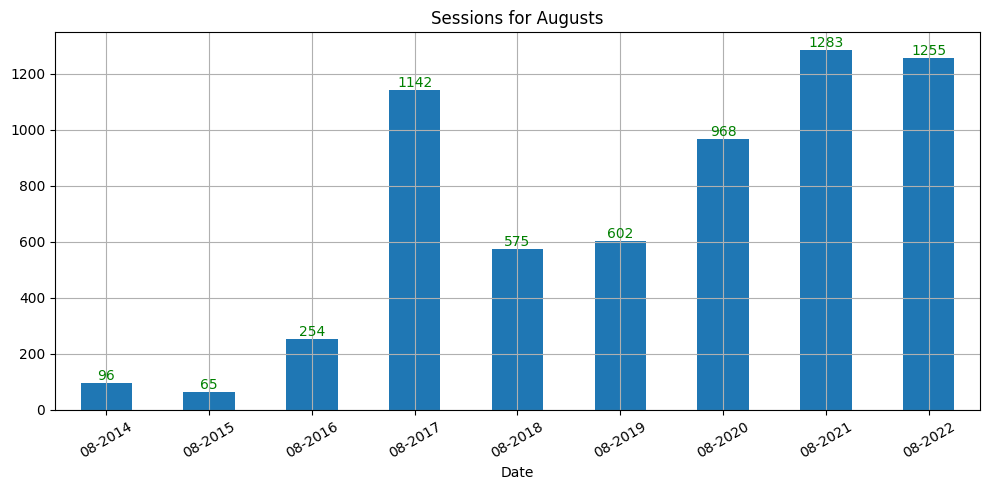

In [23]:
ax8 = augusts.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Augusts"        
)

ax8.bar_label(ax8.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/augusts.png")

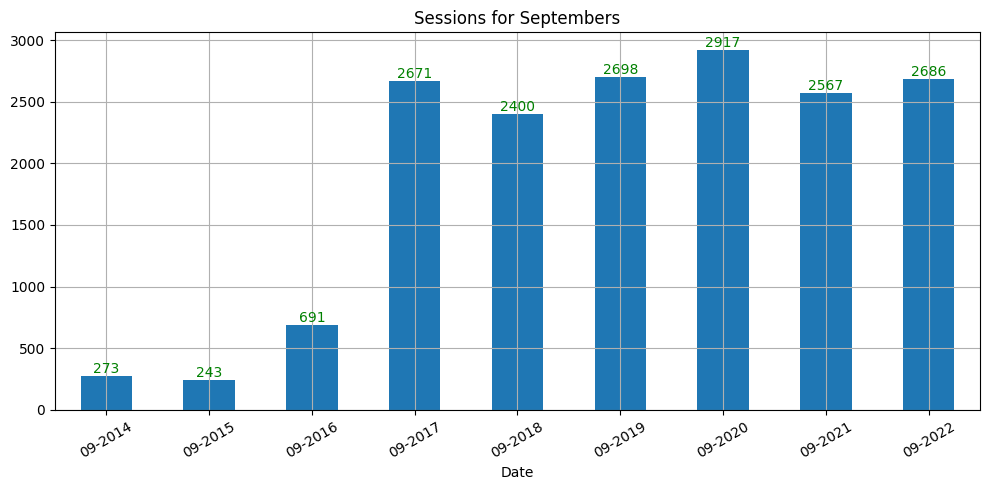

In [24]:
ax9 = septembers.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Septembers"        
)

ax9.bar_label(ax9.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/septembers.png")

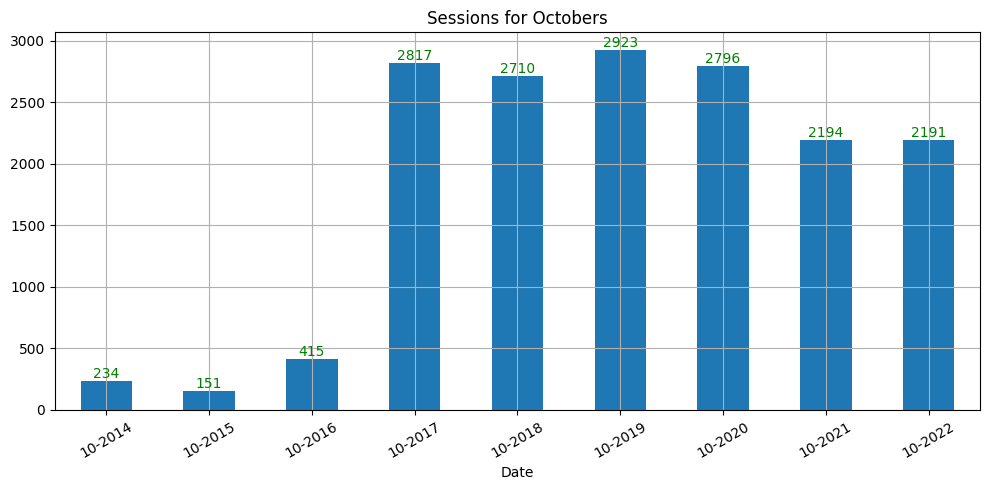

In [25]:
ax10 = octobers.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Octobers"        
)

ax10.bar_label(ax10.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/octobers.png")

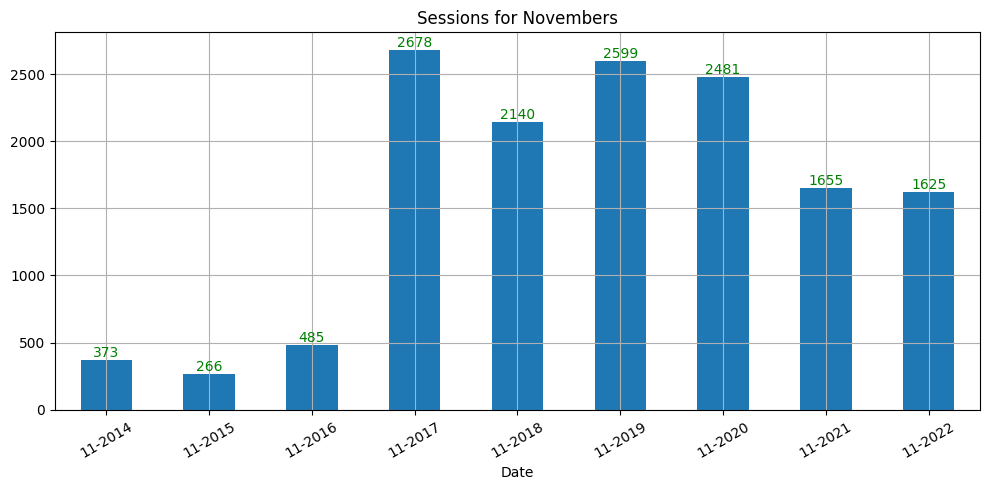

In [26]:
ax11 = novembers.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Novembers"        
)

ax11.bar_label(ax11.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/novembers.png")

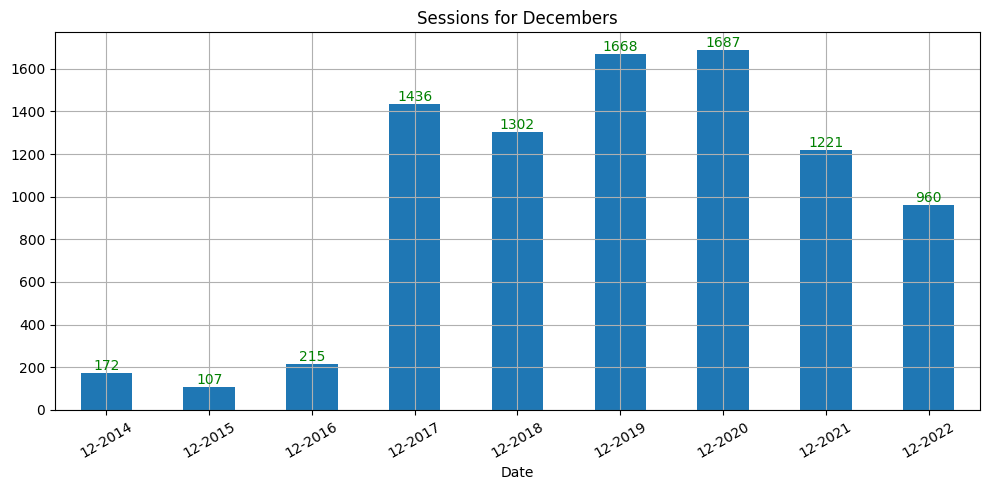

In [27]:
ax12 = decembers.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Decembers"        
)

ax12.bar_label(ax12.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/decembers.png")

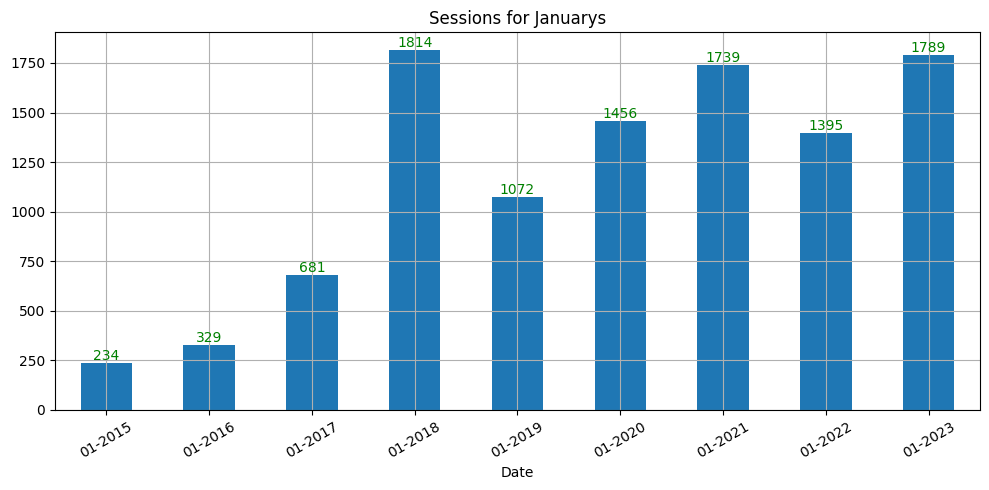

In [28]:
ax1 = januarys.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Januarys"        
)

ax1.bar_label(ax1.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/januarys.png")

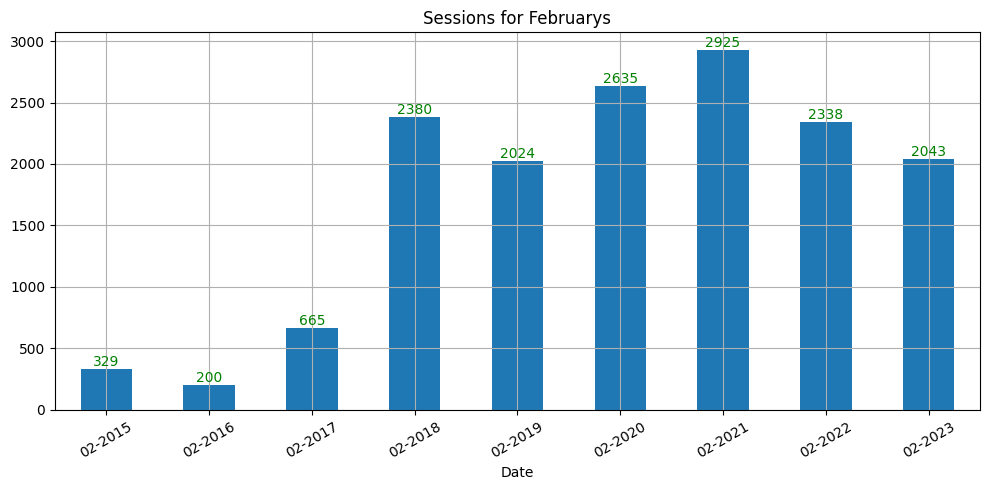

In [29]:
ax2 = februarys.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Februarys"        
)

ax2.bar_label(ax2.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/februarys.png")

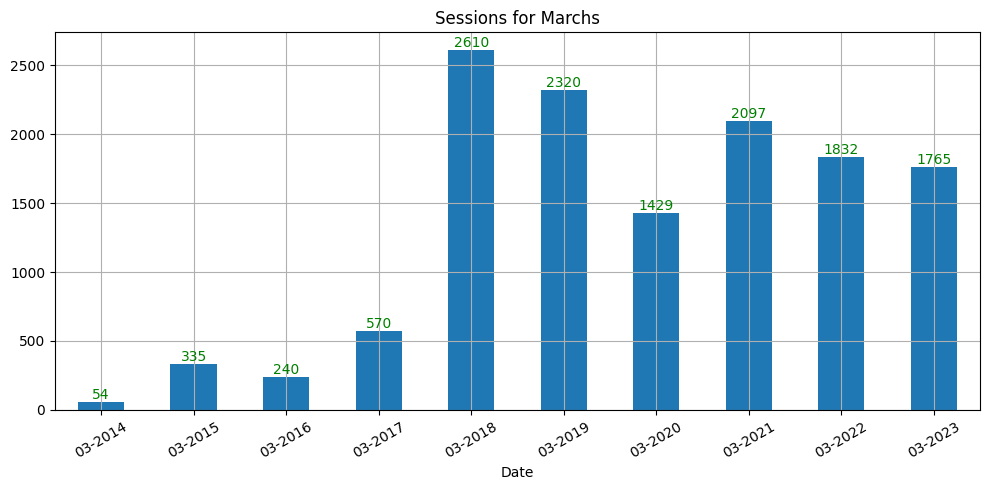

In [30]:
ax3= marchs.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Marchs"        
)

ax3.bar_label(ax3.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/marchs.png")

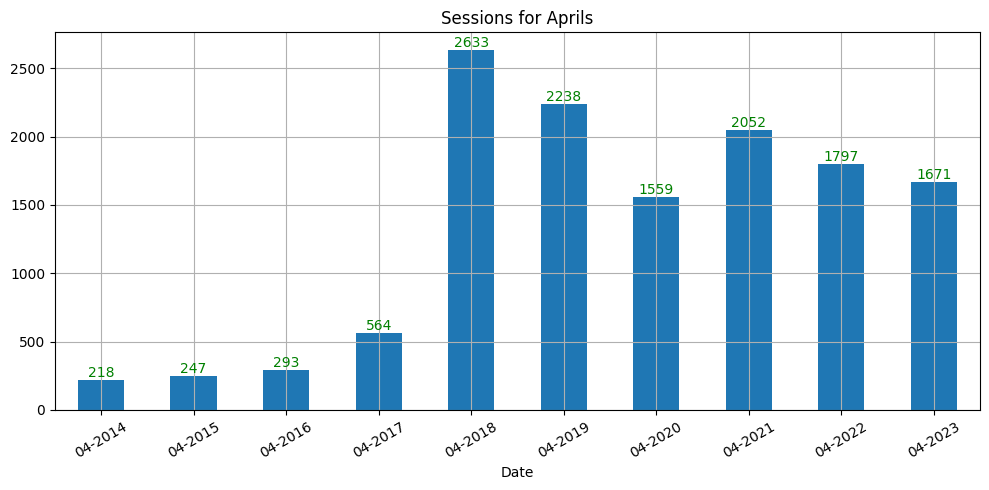

In [31]:
ax4 = aprils.plot(
        x="Formatted_Date", 
        y="Sessions", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Date",        
        title=f"Sessions for Aprils"        
)

ax4.bar_label(ax4.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/aprils.png")

# Inferences

In [32]:
sessions_summer_bymonth["Month"] = sessions_summer_bymonth["Formatted_Date"].apply(lambda x: x[:2])
sessions_summer_bymonth = sessions_summer_bymonth.reset_index(drop=True)

sessions_summer_bymonth

,Date,Sessions,Formatted_Date,Month
0,2014-05-01,108,05-2014,05
1,2015-05-01,47,05-2015,05
2,2016-05-01,228,05-2016,05
3,2017-05-01,247,05-2017,05
4,2018-05-01,1096,05-2018,05
5,2019-05-01,1213,05-2019,05
6,2020-05-01,895,05-2020,05
7,2021-05-01,1066,05-2021,05
8,2022-05-01,846,05-2022,05
9,2023-05-01,169,05-2023,05


In [33]:
maxs = sessions_summer_bymonth.groupby(["Month"])["Sessions"].max()
maxs.name = "Max"
maxs

Month
05    1213
06     826
07    1291
Name: Max, dtype: int64

In [34]:
mins = sessions_summer_bymonth.groupby(["Month"])["Sessions"].min()
mins.name = "Min"
mins

Month
05    47
06    92
07    52
Name: Min, dtype: int64

In [35]:
last = sessions_summer_bymonth.loc[ (sessions_summer_bymonth["Formatted_Date"].str.endswith("2022"))   , "Sessions"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
05     846
06     776
07    1275
Name: Last, dtype: int64

In [36]:
summer_df = pd.concat([maxs, mins, last], axis=1)
summer_df

,Max,Min,Last
Month,,,
05,1213,47,846
06,826,92,776
07,1291,52,1275


In [37]:
summer_df["Max_to_Last_%Change"] = round((summer_df["Last"] - summer_df["Max"]) / summer_df["Max"] * 100, 2)
summer_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
05,1213,47,846,-30.26
06,826,92,776,-6.05
07,1291,52,1275,-1.24


In [38]:
summer_df["Max_to_Min_%Change"] = round((summer_df["Min"] - summer_df["Max"]) / summer_df["Max"] * 100, 2)
summer_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
05,1213,47,846,-30.26,-96.13
06,826,92,776,-6.05,-88.86
07,1291,52,1275,-1.24,-95.97


In [39]:
sessions_fall_bymonth["Month"] = sessions_fall_bymonth["Formatted_Date"].apply(lambda x: x[:2])

sessions_fall_bymonth

,Date,Sessions,Formatted_Date,Month
0,2014-08-01,96,08-2014,08
1,2015-08-01,65,08-2015,08
2,2016-08-01,254,08-2016,08
3,2017-08-01,1142,08-2017,08
4,2018-08-01,575,08-2018,08
5,2019-08-01,602,08-2019,08
6,2020-08-01,968,08-2020,08
7,2021-08-01,1283,08-2021,08
8,2022-08-01,1255,08-2022,08
9,2014-09-01,273,09-2014,09


In [40]:
maxs = sessions_fall_bymonth.groupby(["Month"])["Sessions"].max()
maxs.name = "Max"
maxs

Month
08    1283
09    2917
10    2923
11    2678
12    1687
Name: Max, dtype: int64

In [41]:
mins = sessions_fall_bymonth.groupby(["Month"])["Sessions"].min()
mins.name = "Min"
mins

Month
08     65
09    243
10    151
11    266
12    107
Name: Min, dtype: int64

In [42]:
last = sessions_fall_bymonth.loc[ (sessions_fall_bymonth["Formatted_Date"].str.endswith("2022"))   , "Sessions"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
08    1255
09    2686
10    2191
11    1625
12     960
Name: Last, dtype: int64

In [43]:
fall_df = pd.concat([maxs, mins, last], axis=1)
fall_df

,Max,Min,Last
Month,,,
08,1283,65,1255
09,2917,243,2686
10,2923,151,2191
11,2678,266,1625
12,1687,107,960


In [44]:
fall_df["Max_to_Last_%Change"] = round((fall_df["Last"] - fall_df["Max"]) / fall_df["Max"] * 100, 2)
fall_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
08,1283,65,1255,-2.18
09,2917,243,2686,-7.92
10,2923,151,2191,-25.04
11,2678,266,1625,-39.32
12,1687,107,960,-43.09


In [45]:
fall_df["Max_to_Min_%Change"] = round((fall_df["Min"] - fall_df["Max"]) / fall_df["Max"] * 100, 2)
fall_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
08,1283,65,1255,-2.18,-94.93
09,2917,243,2686,-7.92,-91.67
10,2923,151,2191,-25.04,-94.83
11,2678,266,1625,-39.32,-90.07
12,1687,107,960,-43.09,-93.66


In [46]:
sessions_spring_bymonth["Month"] = sessions_spring_bymonth["Formatted_Date"].apply(lambda x: x[:2])

sessions_spring_bymonth

,Date,Sessions,Formatted_Date,Month
0,2015-01-01,234,01-2015,01
1,2016-01-01,329,01-2016,01
2,2017-01-01,681,01-2017,01
3,2018-01-01,1814,01-2018,01
4,2019-01-01,1072,01-2019,01
5,2020-01-01,1456,01-2020,01
6,2021-01-01,1739,01-2021,01
7,2022-01-01,1395,01-2022,01
8,2023-01-01,1789,01-2023,01
9,2015-02-01,329,02-2015,02


In [47]:
maxs = sessions_spring_bymonth.groupby(["Month"])["Sessions"].max()
maxs.name = "Max"
maxs

Month
01    1814
02    2925
03    2610
04    2633
Name: Max, dtype: int64

In [48]:
mins = sessions_spring_bymonth.groupby(["Month"])["Sessions"].min()
mins.name = "Min"
mins

Month
01    234
02    200
03     54
04    218
Name: Min, dtype: int64

In [49]:
last = sessions_spring_bymonth.loc[ (sessions_spring_bymonth["Formatted_Date"].str.endswith("2022"))   , "Sessions"]

last.name = "Last"
last.index = mins.index

last

# last.iloc[-1]

Month
01    1395
02    2338
03    1832
04    1797
Name: Last, dtype: int64

In [50]:
spring_df = pd.concat([maxs, mins, last], axis=1)
spring_df

,Max,Min,Last
Month,,,
01,1814,234,1395
02,2925,200,2338
03,2610,54,1832
04,2633,218,1797


In [51]:
spring_df["Max_to_Last_%Change"] = round((spring_df["Last"] - spring_df["Max"]) / spring_df["Max"] * 100, 2)
spring_df

,Max,Min,Last,Max_to_Last_%Change
Month,,,,
01,1814,234,1395,-23.10
02,2925,200,2338,-20.07
03,2610,54,1832,-29.81
04,2633,218,1797,-31.75


In [52]:
spring_df["Max_to_Min_%Change"] = round((spring_df["Min"] - spring_df["Max"]) / spring_df["Max"] * 100, 2)
spring_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
01,1814,234,1395,-23.10,-87.10
02,2925,200,2338,-20.07,-93.16
03,2610,54,1832,-29.81,-97.93
04,2633,218,1797,-31.75,-91.72


In [53]:
year_df = pd.concat([spring_df, summer_df, fall_df], axis=0)
year_df

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
Month,,,,,
01,1814,234,1395,-23.10,-87.10
02,2925,200,2338,-20.07,-93.16
03,2610,54,1832,-29.81,-97.93
04,2633,218,1797,-31.75,-91.72
05,1213,47,846,-30.26,-96.13
06,826,92,776,-6.05,-88.86
07,1291,52,1275,-1.24,-95.97
08,1283,65,1255,-2.18,-94.93
09,2917,243,2686,-7.92,-91.67


In [54]:
year_df.describe()

,Max,Min,Last,Max_to_Last_%Change,Max_to_Min_%Change
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2066.666667,144.083333,1581.333333,-21.652500,-93.002500
std,790.544270,84.063243,609.482990,14.328113,3.224895
min,826.000000,47.000000,776.000000,-43.090000,-97.930000
25%,1289.000000,62.250000,1181.250000,-30.632500,-95.190000
50%,2212.000000,129.000000,1510.000000,-24.070000,-93.410000
75%,2737.750000,222.000000,1921.750000,-7.452500,-91.270000
max,2925.000000,266.000000,2686.000000,-1.240000,-87.100000


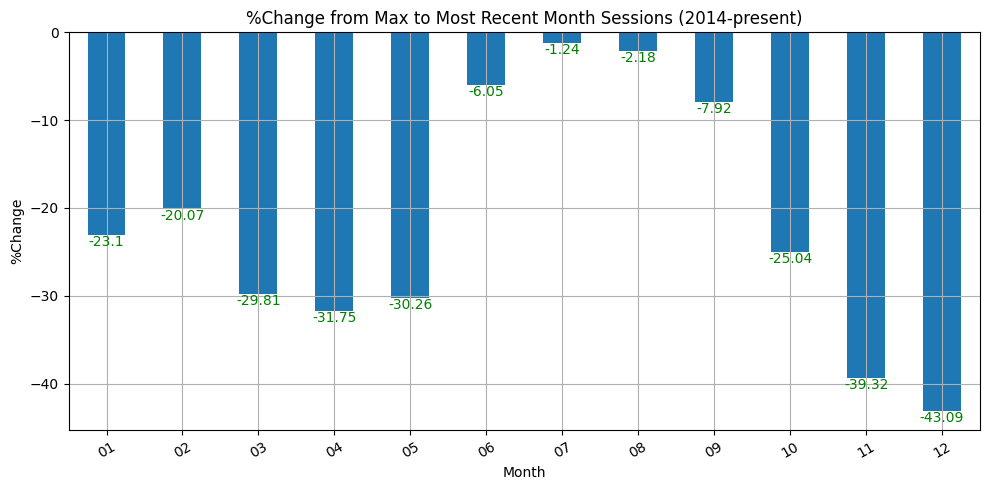

In [55]:
ax12_1 = year_df.plot(
        y="Max_to_Last_%Change", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Month", 
        ylabel="%Change",
        title=f"%Change from Max to Most Recent Month Sessions (2014-present)"        
)

ax12_1.bar_label(ax12_1.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/sessions_max_to_most_recent.png")

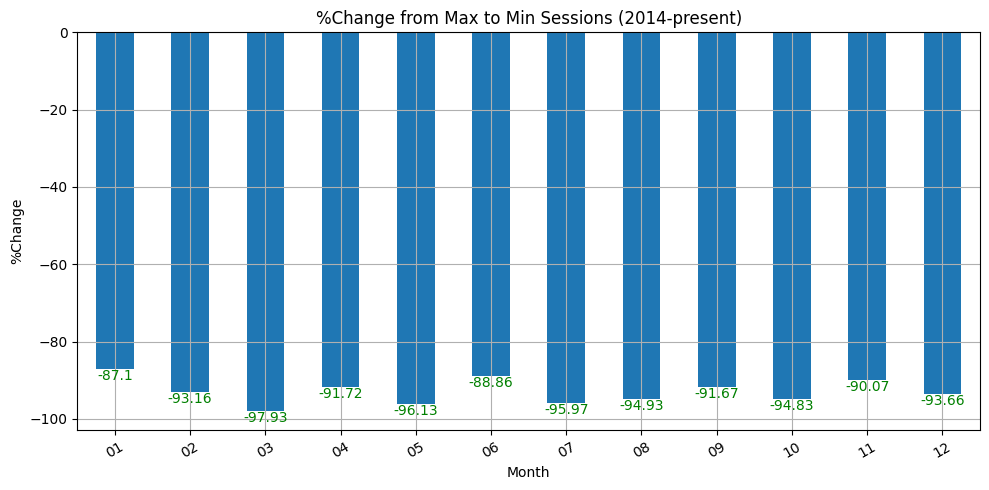

In [56]:
ax12_2 = year_df.plot(
        y="Max_to_Min_%Change", 
        figsize=(10,5),
        kind="bar", 
        legend=False,
        grid=True,
        rot=30,
        xlabel="Month", 
        ylabel="%Change",
        title=f"%Change from Max to Min Sessions (2014-present)"        
)

ax12_2.bar_label(ax12_2.containers[0], color="green")
plt.tight_layout()

plt.savefig("Sessions/sessions_max_to_min.png")

In [57]:
print(f'Mean of sessions: {sessions_df_alltime["Sessions"].mean()}') 
print(f'Median of sessions: {sessions_df_alltime["Sessions"].median()}') 
print(f'Mode of sessions: {st.mode(sessions_df_alltime["Sessions"], axis=None, keepdims=False)}') 

print(f'Min of sessions: {sessions_df_alltime["Sessions"].min()}') 
print(f'Max of sessions: {sessions_df_alltime["Sessions"].max()}') 

Mean of sessions: 1204.2972972972973
Median of sessions: 1096.0
Mode of sessions: ModeResult(mode=234, count=2)
Min of sessions: 47
Max of sessions: 2925
